In [3]:
from shapely.geometry import Point
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline

In [4]:
may_trip = pd.read_csv('../data/may_trip.csv')
june_trip = pd.read_csv('../data/june_trip.csv')
july_trip = pd.read_csv('../data/july_trip.csv')

In [5]:
may_trip_clean = pd.read_csv('../data/may_trip_clean.csv')

In [6]:
promise_zones = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
print(promise_zones.crs)


promise_zones.head()

epsg:2274


,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812 678044.543, 1743367.698 ..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545 661791.347, 1738733.644 ..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.544 668309.889, 1759640.155 ..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.003 654974.612, 1747821.293 ..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.744 692634.639, 1737122.605 ..."


In [7]:
promise_zones = promise_zones.to_crs('EPSG:4326')
print(promise_zones.crs)

EPSG:4326


In [8]:
may_trip_clean.head()

,Unnamed: 0,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,...,endLatitude,endLongitude,tripRoute,create_dt,start,end,totaltime,seconds,hours,minutes
0,0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00.000000,00:00:20.460000,2019-05-01 00:00:00.000000,...,36.15660,-86.80670,"36.157235,-86.803612,36.157235,-86.80362,36.15...",2019-05-02 05:30:23.780000,2019-05-01 00:00:20.460000,2019-05-01 00:02:52.346666,0 days 00:02:31.886666,151.886666,0,2.531444
1,1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00.000000,00:01:50.090000,2019-05-01 00:00:00.000000,...,36.16054,-86.77689,"36.15797,-86.77896,36.15795,-86.77873,36.15798...",2019-05-02 07:20:32.757000,2019-05-01 00:01:50.090000,2019-05-01 00:03:33.026666,0 days 00:01:42.936666,102.936666,0,1.715611
2,2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00.000000,00:03:47.363333,2019-05-01 00:00:00.000000,...,36.15650,-86.78680,"36.155068,-86.782124,36.156597,-86.78675",2019-05-02 05:30:24.530000,2019-05-01 00:03:47.363333,2019-05-01 00:07:13.596666,0 days 00:03:26.233333,206.233333,0,3.437222
3,3,2019-05-01 00:05:55.570000,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01 00:00:00.000000,00:04:21.386666,2019-05-01 00:00:00.000000,...,36.15310,-86.77960,"36.149741,-86.779344,36.149741,-86.779327,36.1...",2019-05-02 05:30:24.237000,2019-05-01 00:04:21.386666,2019-05-01 00:06:59.176666,0 days 00:02:37.790000,157.790000,0,2.629833
4,4,2019-05-01 00:05:55.570000,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01 00:00:00.000000,00:04:27.796666,2019-05-01 00:00:00.000000,...,36.17740,-86.78760,"36.177699,-86.786477,36.177711,-86.786469,36.1...",2019-05-02 05:30:24.207000,2019-05-01 00:04:27.796666,2019-05-01 00:06:23.150000,0 days 00:01:55.353334,115.353334,0,1.922556


In [9]:
type(may_trip_clean)

pandas.core.frame.DataFrame

In [10]:
may_trip_clean['geometry'] = may_trip_clean.apply(lambda x: Point((x.startLongitude, 
                                                         x.startLatitude)), 
                                        axis=1)
may_trip_clean.head(3)

,Unnamed: 0,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,...,endLongitude,tripRoute,create_dt,start,end,totaltime,seconds,hours,minutes,geometry
0,0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00.000000,00:00:20.460000,2019-05-01 00:00:00.000000,...,-86.80670,"36.157235,-86.803612,36.157235,-86.80362,36.15...",2019-05-02 05:30:23.780000,2019-05-01 00:00:20.460000,2019-05-01 00:02:52.346666,0 days 00:02:31.886666,151.886666,0,2.531444,POINT (-86.8036 36.1571)
1,1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00.000000,00:01:50.090000,2019-05-01 00:00:00.000000,...,-86.77689,"36.15797,-86.77896,36.15795,-86.77873,36.15798...",2019-05-02 07:20:32.757000,2019-05-01 00:01:50.090000,2019-05-01 00:03:33.026666,0 days 00:01:42.936666,102.936666,0,1.715611,POINT (-86.77896 36.15797)
2,2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00.000000,00:03:47.363333,2019-05-01 00:00:00.000000,...,-86.78680,"36.155068,-86.782124,36.156597,-86.78675",2019-05-02 05:30:24.530000,2019-05-01 00:03:47.363333,2019-05-01 00:07:13.596666,0 days 00:03:26.233333,206.233333,0,3.437222,POINT (-86.7818 36.1547)


In [11]:
may_trip_clean_geo = gpd.GeoDataFrame(may_trip_clean, 
                           crs = promise_zones.crs, 
                           geometry = may_trip_clean['geometry'])

In [12]:
may_trip_clean_pro_start = gpd.sjoin(may_trip_clean_geo, promise_zones, op = 'within')

In [13]:
may_trip_clean_pro_start.head()

,Unnamed: 0,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,...,totaltime,seconds,hours,minutes,geometry,index_right,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe
0,0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.000000,958.00528,2019-05-01 00:00:00.000000,00:00:20.460000,2019-05-01 00:00:00.000000,...,0 days 00:02:31.886666,151.886666,0,2.531444,POINT (-86.80360 36.15710),4,5,5,3.928178e+08,106661.712102
4,4,2019-05-01 00:05:55.570000,Bird,BRD2165,PoweredJ7MB3,2.000000,351.04988,2019-05-01 00:00:00.000000,00:04:27.796666,2019-05-01 00:00:00.000000,...,0 days 00:01:55.353334,115.353334,0,1.922556,POINT (-86.78660 36.17780),4,5,5,3.928178e+08,106661.712102
8,8,2019-05-01 00:10:56.013000,Bird,BRD2193,PoweredSX2AW,6.000000,2624.67200,2019-05-01 00:00:00.000000,00:06:34.436666,2019-05-01 00:00:00.000000,...,0 days 00:06:14.240000,374.240000,0,6.237333,POINT (-86.78930 36.17080),4,5,5,3.928178e+08,106661.712102
27,27,2019-05-01 00:15:55.977000,Bird,BRD2212,PoweredVGMWJ,10.000000,5249.34400,2019-05-01 00:00:00.000000,00:07:07.963333,2019-05-01 00:00:00.000000,...,0 days 00:09:50.800000,590.800000,0,9.846667,POINT (-86.78470 36.17650),4,5,5,3.928178e+08,106661.712102
48,48,2019-05-01 00:25:34,Lyft,LFT42,Powered906727,14.803383,2004.59324,2019-05-01 00:00:00.000000,00:10:45.676666,2019-05-01 00:00:00.000000,...,0 days 00:14:48.203334,888.203334,0,14.803389,POINT (-86.79429 36.17546),4,5,5,3.928178e+08,106661.712102


In [14]:
may_trip_clean_geo['sumdID'].value_counts

<bound method IndexOpsMixin.value_counts of 0                 Powered9EAJL
1                Powered296631
2                 Powered7S2UU
3                 PoweredZIIVX
4                 PoweredJ7MB3
                  ...         
220382    Powered2OFHK7WJJGPSG
220383    PoweredJ6OI7QJIK4NO2
220384    PoweredQDVYGLDL6ZQDU
220385    PoweredH5HCTZB5WVABT
220386    PoweredFXC5KHVLI3T7C
Name: sumdID, Length: 220387, dtype: object>

In [15]:
may_grouped2 = may_trip_clean_geo.groupby("companyName")

may_grouped2 = may_grouped2.agg({"sumdID": "nunique"})

may_grouped2

,sumdID
companyName,
Bird,2937
Bolt Mobility,341
Gotcha,105
JUMP,1
Lime,1576
Lyft,1359
SPIN,636


In [19]:
2937+341+105+1+1576+1359+636

6955

In [20]:
220387/6955

31.687562904385334

In [25]:
efficiency = may_grouped2['companyName']

KeyError: 'companyName'

In [26]:
sumdid_by_zone = may_trip_clean_pro_start.groupby("ZONE_ID")

sumdid_by_zone = sumdid_by_zone.agg({"sumdID": "nunique"})

sumdid_by_zone

,sumdID
ZONE_ID,
1,4368
2,3543
3,417
4,96
5,4135
6,38


In [27]:
trips_by_zone = may_trip_clean_pro_start.groupby('ZONE_ID').size()
trips_by_zone

ZONE_ID
1    15643
2    14854
3      653
4      170
5    14349
6       57
dtype: int64

In [28]:
15643+14854+653

31150

In [29]:
zone1 = 15643/4368/31
zone1

0.11552493205719012

In [30]:
zone2 = 14854/3543/31
zone2

0.13524168510374843

In [31]:
zone3 = 653/417/31
zone3

0.05051442716794306

In [32]:
d = {'companyName': ['Bird','Bolt Mobility', 'Gotcha', 'Lime','Lyft', 'SPIN'], 'avg_rides_per_scooter_per_day': [.56, .46, .20,2.10,1.24,.43]}
company_efficiency = pd.DataFrame(data=d)
company_efficiency = company_efficiency.sort_values(by=['avg_rides_per_scooter_per_day'], ascending=False)

<AxesSubplot:xlabel='companyName'>

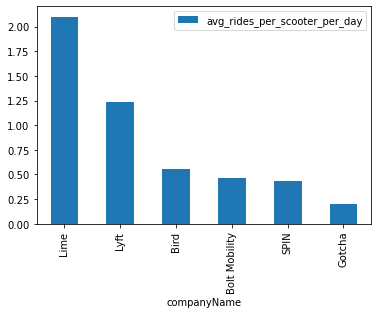

In [33]:
company_efficiency.plot.bar(x = 'companyName')

In [34]:
trips = may_trip_clean_geo.groupby('companyName').size()

trips

companyName
Bird              51236
Bolt Mobility      4847
Gotcha              650
JUMP                593
Lime             102569
Lyft              52036
SPIN               8456
dtype: int64

In [35]:
total_rides = 51236+4847+650+593+102569+52036+8456

total_rides

220387

In [ ]:
total_scooters= 2937+341+105+z

In [ ]:
zz

In [ ]:
bird_efficiency = 51236/2937/31

bird_efficiency

In [ ]:
bolt_efficiency = 4847/341/31

bolt_efficiency

In [ ]:
gotcha_efficiency =650/105/31

gotcha_efficiency


In [ ]:
jump_efficiency = 593/1/31

jump_efficiency


In [ ]:
jump_scooters = may_trip_clean_geo.loc[may_trip_clean_geo['companyName'] == 'JUMP']

jump_scooters

In [ ]:
lime_efficiency = 102569/1576/31

lime_efficiency

In [ ]:
lyft_efficiency = 52036/1359/31

lyft_efficiency

In [ ]:
spin_efficiency = 8456/636/31

spin_efficiency

In [ ]:
may_trip_clean_geo_3 = may_trip_clean_geo[(may_trip_clean_geo[''] == 22)

In [ ]:
may_trip_clean_geo['number_of_trips'] = if sum(may_trip_clean_geo['sumdid'] >= 3, 'efficient'

In [ ]:
may_trip_clean_geo['number_of_trips'] = np.where(sum(may_trip_clean_geo['sumdID']) >=3, may_trip_clean_geo['efficient'],\ 
        np.where(sum(may_trip_clean_geo['sumdID']) <3, may_trip_clean_geo['not_effecient'],\


In [ ]:
print("Count of students with physics marks greater than 11 is->",
      dataframe[dataframe['Physics'] > 11]['Name'].count())

In [ ]:
value_counts = may_trip_clean_geo['sumdID'].value_counts()

value_counts


In [ ]:
print(value_counts[value_counts > 2].index[0])

In [ ]:
may_trip_clean_geo['number_of_trips'] = if sum(may_trip_clean_geo['sumdid'].value_counts() >= 3, 'efficient')
                                            else may_trip_clean_geo['sumdid']

In [ ]:
may_trip_clean_geo.shape

In [ ]:
may_trip_clean_geo.nunique()

In [ ]:
rides_per_scooter = 220387/6955

In [ ]:
rides_per_scooter_per_day = rides_per_scooter/31

rides_per_scooter_per_day

In [ ]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

In [ ]:
may_trip_clean.head()

In [ ]:
may_trip_clean['startDate'].value_counts()

May 26 has most trips in May - 14584

May 9th has least - 4177

In [ ]:
May 26 13695,May 2 3821

In [ ]:
max and in trips